In [4]:
import numpy as np
import os 
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 


%matplotlib inline

In [2]:
def read_from_file(name):
    '''
        Return loaded object given by input name
    '''
    print 'reading structures from pickle'
    print '------------------------------'

    path = os.getcwd() + '/pickles/' + name + '.pkl'
    file = open(path, 'rb')
    new_obj = pickle.load(file)
    file.close()

    return new_obj

In [59]:
extracted_ref = read_from_file('extracted_ref')
extracted_spike = read_from_file('extracted_spike')


reading structures from pickle
------------------------------
reading structures from pickle
------------------------------


In [7]:
extracted_ref['Spike'].keys()

['HLA-C0602',
 'HLA-A3101',
 'HLA-C1502',
 'HLA-B4501',
 'HLA-B0702',
 'HLA-C0702',
 'HLA-C0701',
 'HLA-B1801',
 'HLA-B0801',
 'HLA-C1402',
 'HLA-B0803',
 'HLA-B0802',
 'HLA-C0401',
 'HLA-B5401',
 'HLA-B5101',
 'HLA-A6801',
 'HLA-A2402',
 'HLA-A2403',
 'HLA-B3503',
 'HLA-A6802',
 'HLA-A2501',
 'HLA-A0212',
 'HLA-A0211',
 'HLA-A0217',
 'HLA-A1101',
 'HLA-E0101',
 'HLA-A3215',
 'HLA-B4001',
 'HLA-A0219',
 'HLA-B4002',
 'HLA-B3801',
 'HLA-B1402',
 'HLA-B1517',
 'HLA-B3901',
 'HLA-B8301',
 'HLA-B7301',
 'HLA-B1502',
 'HLA-A0101',
 'HLA-B4801',
 'HLA-A6901',
 'HLA-B5801',
 'HLA-C0501',
 'HLA-A6823',
 'HLA-B5802',
 'HLA-B5701',
 'HLA-A0250',
 'HLA-C0303',
 'HLA-A0202',
 'HLA-A3002',
 'HLA-A3001',
 'HLA-B4403',
 'HLA-A2301',
 'HLA-B3501',
 'HLA-A3301',
 'HLA-C1203',
 'HLA-B4402',
 'HLA-B4601',
 'HLA-A0216',
 'HLA-A3201',
 'HLA-A0205',
 'HLA-A0206',
 'HLA-A0207',
 'HLA-A0201',
 'HLA-A3207',
 'HLA-A0203',
 'HLA-A2602',
 'HLA-A6601',
 'HLA-B4201',
 'HLA-A2601',
 'HLA-A0301',
 'HLA-C0802',
 'HLA-

In [44]:
positions_hla_ref_spike = {}
for hla, peptide_list in extracted_ref['Spike'].iteritems(): 
    positions_hla_ref_spike[hla] = [int(pep[0]) for pep in peptide_list]
    

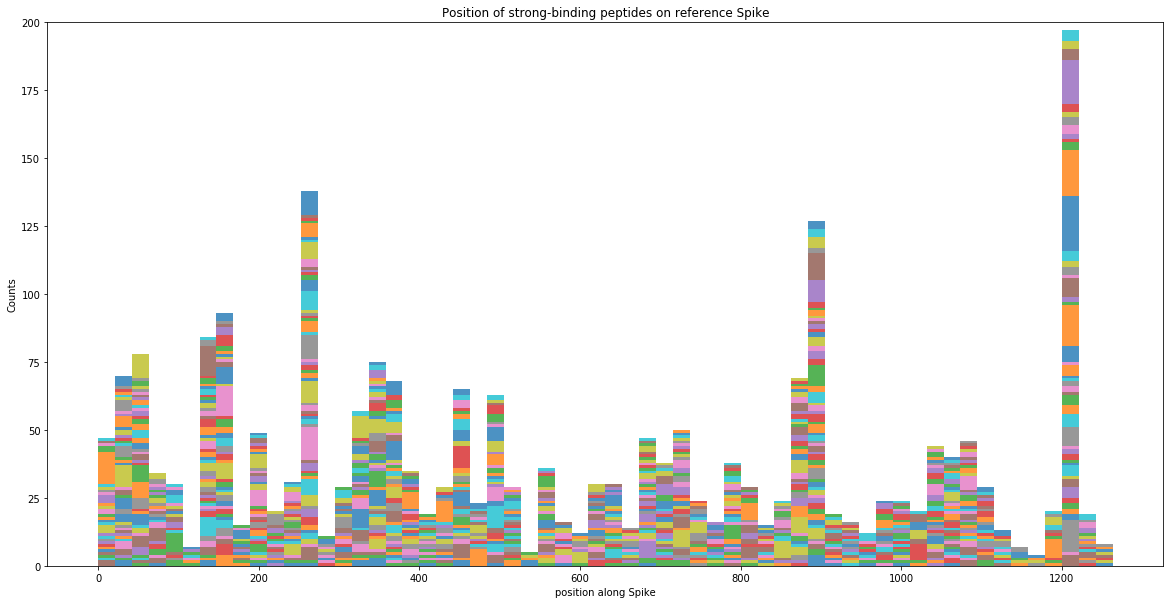

In [55]:
f = plt.figure(figsize=(20,10))
aggreg_pos = []
aggreg_label = []

for hla, positions in positions_hla_ref_spike.iteritems(): 
    aggreg_pos.append(positions)
    aggreg_label.append(hla)
    
plt.hist(aggreg_pos, bins=60, alpha=.8, histtype='barstacked', label=aggreg_label)

plt.xlabel('position along Spike')
plt.ylabel('Counts')
plt.ylim([0, 200])
plt.title('Position of strong-binding peptides on reference Spike')
# plt.legend()
plt.show()


### Generate aggregated position without HLA segregation

In [23]:
all_hla_binders = [extracted_ref['Spike'][key] for key in extracted_ref['Spike'].keys()] 
positions = []
for all_binders in all_hla_binders:
    for binder in all_binders: 
        positions.append(int(binder[0]))


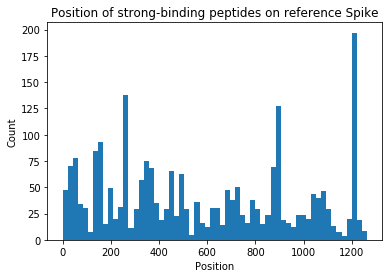

In [34]:
f = plt.hist(positions, bins=60)
plt.title('Position of strong-binding peptides on reference Spike')
plt.ylabel('Count')
plt.xlabel('Position')
plt.show()

In [79]:
positions_extracted_spike = {}
for strain in extracted_spike.keys(): 
    extracted_spike_positions = [] 
    extracted_spike_labels = []
    for hla in extracted_spike[strain].keys():
        extracted_spike_labels.append(hla)
        temp_pos = []
        for peptide_info in extracted_spike[strain][hla]: 
            temp_pos.append(int(peptide_info[0]))
        extracted_spike_positions.append(temp_pos)
               
    positions_extracted_spike = {strain: [extracted_spike_positions, extracted_spike_labels]}
                



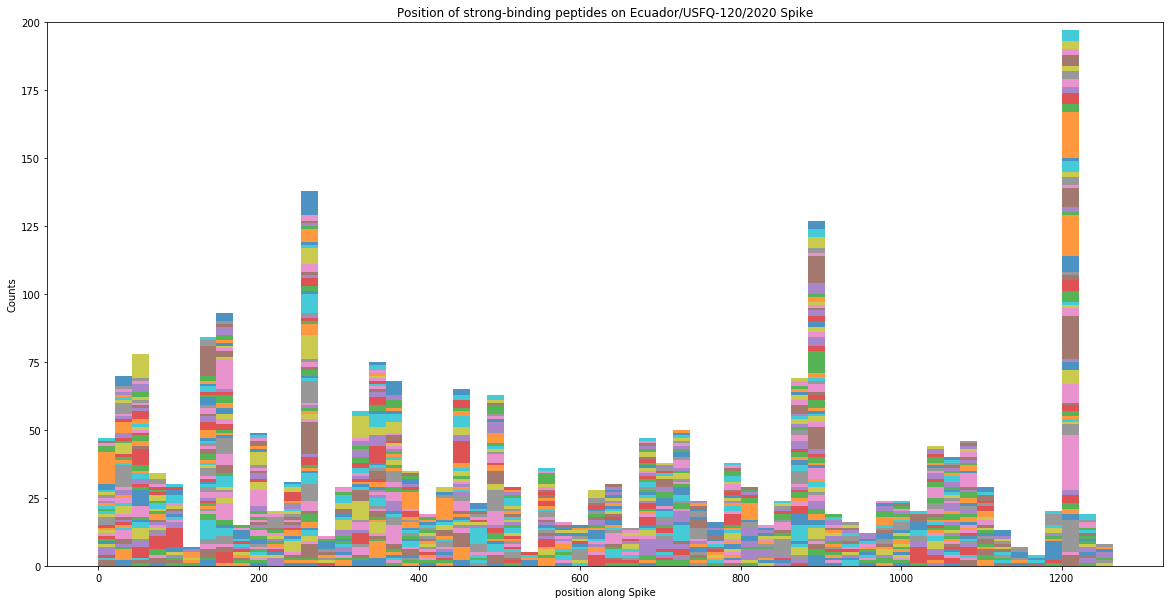

In [80]:
f = plt.figure(figsize=(20,10))
strain = positions_extracted_spike.keys()[0]

plt.hist(positions_extracted_spike[strain][0], bins=60, alpha=.8, histtype='barstacked', label=positions_extracted_spike[strain][1])

plt.xlabel('position along Spike')
plt.ylabel('Counts')
plt.ylim([0, 200])
plt.title('Position of strong-binding peptides on %s Spike'%strain)
# plt.legend()
plt.show()

In [74]:
cores_hla_ref_spike = {}
for hla, peptide_list in extracted_ref['Spike'].iteritems(): 
    cores_hla_ref_spike[hla] = [pep[2] for pep in peptide_list]
    
    


In [75]:
for hla, peps in cores_hla_ref_spike.iteritems(): 
    print hla, len(peps)

HLA-C0602 27
HLA-B4002 19
HLA-C1502 36
HLA-B4501 20
HLA-B0702 12
HLA-C0702 43
HLA-C0701 29
HLA-B1801 28
HLA-B0801 26
HLA-C1402 36
HLA-B0803 19
HLA-B0802 21
HLA-A3201 26
HLA-C0401 26
HLA-A3207 29
HLA-B5401 38
HLA-C0501 28
HLA-A6801 19
HLA-A6802 44
HLA-A2403 41
HLA-B3503 31
HLA-A2501 32
HLA-A0212 16
HLA-A0211 15
HLA-A0217 20
HLA-A1101 34
HLA-E0101 23
HLA-A3215 39
HLA-B4001 10
HLA-A0219 23
HLA-A3101 29
HLA-B3801 19
HLA-B5802 40
HLA-B1517 27
HLA-B3901 16
HLA-B8301 26
HLA-A2603 25
HLA-A0250 23
HLA-A0101 68
HLA-B4801 17
HLA-A6901 32
HLA-A6823 33
HLA-B1402 23
HLA-C0303 23
HLA-B5801 24
HLA-B5701 18
HLA-A0206 27
HLA-A3002 39
HLA-A3001 23
HLA-B1501 27
HLA-B4403 28
HLA-A2301 46
HLA-B3501 36
HLA-A3301 25
HLA-B5101 30
HLA-B4402 22
HLA-B4601 48
HLA-A0216 20
HLA-C1203 44
HLA-A0205 25
HLA-A2402 65
HLA-A0207 61
HLA-A0201 22
HLA-A0202 21
HLA-A0203 27
HLA-A2602 21
HLA-A6601 28
HLA-B4201 24
HLA-A2601 36
HLA-A0301 28
HLA-C0802 29
HLA-A8001 25
HLA-B1503 38
HLA-B1502 32
HLA-B7301 37
HLA-B4013 42
HLA-B2705 11

In [76]:
cores_hla_ref_spike = {hla:list(set(peps)) for hla, peps in cores_hla_ref_spike.iteritems()}

In [77]:
for hla, peps in cores_hla_ref_spike.iteritems(): 
    print hla, len(peps)

HLA-C0602 27
HLA-A6601 28
HLA-A3101 23
HLA-C1502 36
HLA-B4501 14
HLA-B0702 10
HLA-C0702 39
HLA-C0701 29
HLA-B1801 20
HLA-B0801 23
HLA-C1402 31
HLA-B0803 19
HLA-B0802 21
HLA-C0401 26
HLA-B2705 10
HLA-B5401 32
HLA-C0501 28
HLA-A6801 19
HLA-A6802 41
HLA-A2403 35
HLA-E0101 11
HLA-A2501 27
HLA-A0212 16
HLA-A0211 15
HLA-A0217 15
HLA-A1101 31
HLA-A3215 39
HLA-B4001 7
HLA-A0219 23
HLA-B4002 13
HLA-B3801 15
HLA-B1402 23
HLA-B1517 27
HLA-B3901 16
HLA-B8301 26
HLA-A0101 38
HLA-A2902 23
HLA-B4801 17
HLA-A6901 32
HLA-B5801 24
HLA-A2402 32
HLA-A6823 33
HLA-B5802 26
HLA-B5701 14
HLA-A0250 23
HLA-C0303 23
HLA-A0202 21
HLA-A3002 29
HLA-A3001 21
HLA-A0207 22
HLA-B4403 22
HLA-A2301 33
HLA-B3501 33
HLA-A3301 21
HLA-B3503 23
HLA-B5101 28
HLA-B4601 28
HLA-A0216 20
HLA-A3201 22
HLA-A0205 20
HLA-A0206 26
HLA-C1203 44
HLA-A0201 21
HLA-A3207 29
HLA-A0203 26
HLA-A2602 21
HLA-A2603 25
HLA-B4201 20
HLA-A2601 30
HLA-A0301 25
HLA-C0802 29
HLA-A8001 23
HLA-B1503 36
HLA-B1502 32
HLA-B1501 26
HLA-B4013 28
HLA-B4402 18


In [95]:
cores_extracted_spike = {}
for strain in extracted_spike.keys(): 
    extracted_spike_cores = [] 
    extracted_spike_labels = []
    for hla in extracted_spike[strain].keys():
        extracted_spike_labels.append(hla)
        temp_cores = []
        for peptide_info in extracted_spike[strain][hla]: 
            temp_cores.append(peptide_info[2])
        extracted_spike_cores.append(temp_cores)
               
    cores_extracted_spike[strain] = [extracted_spike_cores, extracted_spike_labels]

In [96]:
seq_variant_cores = {}

for strain, [extracted_spike_cores, extracted_spike_labels] in cores_extracted_spike.iteritems(): 
    seq_variant_cores[strain] = {}
    for cores, hla in zip(extracted_spike_cores, extracted_spike_labels): 
        seq_variant_cores[strain][hla] = set(cores)
    

In [97]:
cores_extracted_spike.keys()

['Latvia/064/2020',
 'Australia/NSW637/2020',
 'England/202822185/2020',
 'England/CAMB-1B53B5/2020',
 'Zhejiang/SX0715/2020',
 'Panama/337442/2020',
 'USA/WA-S2664/2020',
 'Ecuador/USFQ-120/2020',
 'England/NORW-EE475/2020',
 'USA/WI-UW-697/2020',
 'England/NOTT-112538/2020',
 'Singapore/601/2020',
 'Nigeria/ON191-CV49/2020']

In [98]:
seq_variant_cores.keys()

['Latvia/064/2020',
 'Australia/NSW637/2020',
 'England/202822185/2020',
 'England/CAMB-1B53B5/2020',
 'Zhejiang/SX0715/2020',
 'Panama/337442/2020',
 'USA/WA-S2664/2020',
 'Singapore/601/2020',
 'USA/WI-UW-697/2020',
 'Nigeria/ON191-CV49/2020',
 'England/NOTT-112538/2020',
 'England/NORW-EE475/2020',
 'Ecuador/USFQ-120/2020']

In [117]:
strains = [
    "Ecuador/USFQ-120/2020", 
    "Zhejiang/SX0715/2020",
    "Australia/NSW637/2020",
    "SouthAfrica/KRISP-0533/2020",
    "Nigeria/ON191-CV49/2020",
    "USA/WI-UW-697/2020",
    "Latvia/064/2020",
    "Singapore/601/2020",
    "USA/WA-S2664/2020",
    "Panama/337442/2020",
    "England/NOTT-112538/2020",
    "England/NORW-EE475/2020",
    "England/CAMB-1B53B5/2020",
    "England/202822185/2020",
]

In [120]:
hlas = cores_hla_ref_spike.keys()
strains = seq_variant_cores.keys()
grid = np.zeros((len(hlas), 1 + len(strains)))

for i, hla in enumerate(hlas): 
    ref_cores = set(cores_hla_ref_spike[hla])
    
    for j, strain in enumerate(strains): 
        strain_cores = seq_variant_cores[strain][hla]
        
        grid[i,j] = 1.*(len(ref_cores.intersection(strain_cores))) / len(ref_cores.union(strain_cores))

        
    

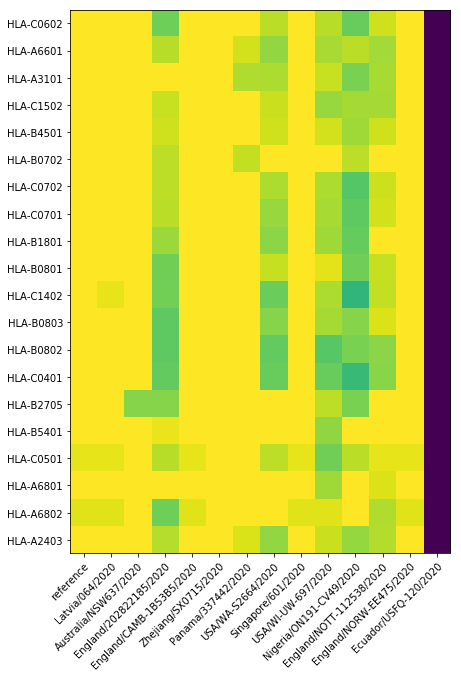

In [129]:
cutoff = 20
# cutoff = np.float('inf')
f, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(grid[:cutoff, :], interpolation='nearest')
ax.set_xticks(np.arange( len(strains)+1))
ax.set_yticks(np.arange(len(hlas[:cutoff])))
ax.set_xticklabels(['reference'] + strains)
ax.set_yticklabels(hlas[:cutoff])

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# for i in range(len(strains)+1):
#     for j in range(len(hlas[:cutoff])):
#         text = ax.text(j, i, grid[i, j],
#                        ha="center", va="center", color="k")
plt.show()